In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import logging
import os

from datetime import datetime

In [ ]:

os.makedirs("logs", exist_ok=True)
log_file = f"logs/pipeline_{datetime.now().strftime('%Y%m%d_%H%M%S')}.txt"

def log(message):
    """Write logs to both console and log file"""
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    formatted_message = f"[{timestamp}] {message}"
    print(formatted_message)  # show on screen
    with open(log_file, "a") as f:
        f.write(formatted_message + "\n")

log("Starting pipeline...")

[2025-09-06 08:38:10] Starting pipeline...


In [68]:
# loading the csv data to a Pandas DataFrame
data = pd.read_csv("C:/Users/konda/Downloads/Bank Branches.csv")
log(f"Loaded dataset with {len(data)} rows and {len(data.columns)} columns.")
data

[2025-09-06 08:38:10] Loaded dataset with 31 rows and 6 columns.


,Districts,Nationalized Banks,Private Banks,Regional Rural Banks,Cooperative Banks,ATMs
0,ADILABAD,18,6,1,9,58
1,BHADRADRI,62,5,35,12,114
2,HYDERABAD,849,264,12,4,1108
3,JAGTIAL,53,17,23,14,96
4,JANGAON,22,6,16,3,33
5,JAYASHANKAR,29,1,24,3,23
6,JOGULAMBA,30,10,11,3,34
7,KAMAREDDY,79,5,22,19,96
8,KARIMNAGAR,315,68,91,11,176
9,KHAMMAM,152,9,22,18,187


In [69]:
data.describe()
log("Discription of dataset.")


[2025-09-06 08:38:10] Discription of dataset.


In [70]:
#Standardize

data.columns = [c.strip().lower().replace(" ", "_") for c in data.columns]
log("Standardizing the data.")
data

[2025-09-06 08:38:10] Standardizing the data.


,districts,nationalized_banks,private_banks,regional_rural_banks,cooperative_banks,atms
0,ADILABAD,18,6,1,9,58
1,BHADRADRI,62,5,35,12,114
2,HYDERABAD,849,264,12,4,1108
3,JAGTIAL,53,17,23,14,96
4,JANGAON,22,6,16,3,33
5,JAYASHANKAR,29,1,24,3,23
6,JOGULAMBA,30,10,11,3,34
7,KAMAREDDY,79,5,22,19,96
8,KARIMNAGAR,315,68,91,11,176
9,KHAMMAM,152,9,22,18,187


In [71]:
data = data.drop_duplicates()
log("Removed duplicate rows.")
data

[2025-09-06 08:38:10] Removed duplicate rows.


,districts,nationalized_banks,private_banks,regional_rural_banks,cooperative_banks,atms
0,ADILABAD,18,6,1,9,58
1,BHADRADRI,62,5,35,12,114
2,HYDERABAD,849,264,12,4,1108
3,JAGTIAL,53,17,23,14,96
4,JANGAON,22,6,16,3,33
5,JAYASHANKAR,29,1,24,3,23
6,JOGULAMBA,30,10,11,3,34
7,KAMAREDDY,79,5,22,19,96
8,KARIMNAGAR,315,68,91,11,176
9,KHAMMAM,152,9,22,18,187


In [72]:
data.loc[data["nationalized_banks"] < 0, "nationalized_banks"] = None 




log("Any district as 0 bank those are replaced with NaN .")
data

[2025-09-06 08:38:11] Any district as 0 bank those are replaced with NaN .


,districts,nationalized_banks,private_banks,regional_rural_banks,cooperative_banks,atms
0,ADILABAD,18.0,6,1,9,58
1,BHADRADRI,62.0,5,35,12,114
2,HYDERABAD,849.0,264,12,4,1108
3,JAGTIAL,53.0,17,23,14,96
4,JANGAON,22.0,6,16,3,33
5,JAYASHANKAR,29.0,1,24,3,23
6,JOGULAMBA,30.0,10,11,3,34
7,KAMAREDDY,79.0,5,22,19,96
8,KARIMNAGAR,315.0,68,91,11,176
9,KHAMMAM,152.0,9,22,18,187


In [73]:
data["total_branches"] = (
    data["nationalized_banks"] +
    data["private_banks"] +
    data["regional_rural_banks"] +
    data["cooperative_banks"]
)
log("Added new column: total_branches.")


[2025-09-06 08:38:11] Added new column: total_branches.


In [74]:
data["atm_per_branch"] = data["atms"] / (data["total_branches"] )
log("Added new column: atm_per_branches.")
data

[2025-09-06 08:38:11] Added new column: atm_per_branches.


,districts,nationalized_banks,private_banks,regional_rural_banks,cooperative_banks,atms,total_branches,atm_per_branch
0,ADILABAD,18.0,6,1,9,58,34.0,1.705882
1,BHADRADRI,62.0,5,35,12,114,114.0,1.000000
2,HYDERABAD,849.0,264,12,4,1108,1129.0,0.981399
3,JAGTIAL,53.0,17,23,14,96,107.0,0.897196
4,JANGAON,22.0,6,16,3,33,47.0,0.702128
5,JAYASHANKAR,29.0,1,24,3,23,57.0,0.403509
6,JOGULAMBA,30.0,10,11,3,34,54.0,0.629630
7,KAMAREDDY,79.0,5,22,19,96,125.0,0.768000
8,KARIMNAGAR,315.0,68,91,11,176,485.0,0.362887
9,KHAMMAM,152.0,9,22,18,187,201.0,0.930348


In [75]:
#For example, what percentage of branches are nationalized.
data["nationalized_share"] = (data["nationalized_banks"] / (data["total_branches"] + 0.00001)) * 100
data["private_share"] = (data["private_banks"] / (data["total_branches"] + 0.00001)) * 100
data["rrb_share"] = (data["regional_rural_banks"] / (data["total_branches"] + 0.00001)) * 100
data["cooperative_share"] = (data["cooperative_banks"] / (data["total_branches"] + 0.00001)) * 100

log("Added new column: nationalized_share.")
log("Added new column: private_share.")
log("Added new column: rrb_share.")
log("Added new column: cooperative_share.")
data



[2025-09-06 08:38:11] Added new column: nationalized_share.
[2025-09-06 08:38:11] Added new column: private_share.
[2025-09-06 08:38:11] Added new column: rrb_share.
[2025-09-06 08:38:11] Added new column: cooperative_share.


,districts,nationalized_banks,private_banks,regional_rural_banks,cooperative_banks,atms,total_branches,atm_per_branch,nationalized_share,private_share,rrb_share,cooperative_share
0,ADILABAD,18.0,6,1,9,58,34.0,1.705882,52.941161,17.647054,2.941176,26.470580
1,BHADRADRI,62.0,5,35,12,114,114.0,1.000000,54.385960,4.385965,30.701752,10.526315
2,HYDERABAD,849.0,264,12,4,1108,1129.0,0.981399,75.199291,23.383525,1.062888,0.354296
3,JAGTIAL,53.0,17,23,14,96,107.0,0.897196,49.532706,15.887849,21.495325,13.084111
4,JANGAON,22.0,6,16,3,33,47.0,0.702128,46.808501,12.765955,34.042546,6.382977
5,JAYASHANKAR,29.0,1,24,3,23,57.0,0.403509,50.877184,1.754386,42.105256,5.263157
6,JOGULAMBA,30.0,10,11,3,34,54.0,0.629630,55.555545,18.518515,20.370367,5.555555
7,KAMAREDDY,79.0,5,22,19,96,125.0,0.768000,63.199995,4.000000,17.599999,15.199999
8,KARIMNAGAR,315.0,68,91,11,176,485.0,0.362887,64.948452,14.020618,18.762886,2.268041
9,KHAMMAM,152.0,9,22,18,187,201.0,0.930348,75.621887,4.477612,10.945273,8.955223


In [76]:
#insights

# 1. Districts with least and most bank branches
least_branches = data.sort_values(by="total_branches").head(5)[["districts", "total_branches"]]
log("Generated insights for least branches")
print("Districts with least branches:\n", least_branches, "\n")


# 2. Districts with lowest and highest ATM coverage
low_atm_coverage = data.sort_values(by="atm_per_branch").head(5)[["districts", "atm_per_branch"]]
log("Generated insights for low ATMs at districts.")
print("Districts with lowest ATM coverage:\n", low_atm_coverage, "\n")

high_atm_coverage = data.sort_values(by="atm_per_branch", ascending=False).head(5)[["districts", "atm_per_branch"]]
log("Generated insights for high ATMs at districts.")
print("Districts with highest ATM coverage:\n", high_atm_coverage, "\n")

# 3. Districts with highest share of each bank type
high_nationalized_share = data.sort_values(by="nationalized_share", ascending=False).head(5)[["districts", "nationalized_share"]]
log("Generated insights for nationalized bank shares")
print("Districts with highest Nationalized Bank share:\n", high_nationalized_share, "\n")

high_private_share = data.sort_values(by="private_share", ascending=False).head(5)[["districts", "private_share"]]
log("Generated insights for private bank shares")
print("Districts with highest Private Bank share:\n", high_private_share, "\n")

high_rrb_share = data.sort_values(by="rrb_share", ascending=False).head(5)[["districts", "rrb_share"]]
log("Generated insights for regional rural bank shares.")
print("Districts with highest Regional Rural Bank (RRB) share:\n", high_rrb_share, "\n")

high_cooperative_share = data.sort_values(by="cooperative_share", ascending=False).head(5)[["districts", "cooperative_share"]]
log("Generated insights for Cooperative Bank share:\n")
print("Districts with highest Cooperative Bank share:\n", high_cooperative_share, "\n")


[2025-09-06 08:38:11] Generated insights for least branches
Districts with least branches:
          districts  total_branches
0         ADILABAD            34.0
10  KOMARAM BHEEM             38.0
4         JANGAON             47.0
6       JOGULAMBA             54.0
5     JAYASHANKAR             57.0 

[2025-09-06 08:38:11] Generated insights for low ATMs at districts.
Districts with lowest ATM coverage:
          districts  atm_per_branch
23     SANGAREDDY         0.320000
8      KARIMNAGAR         0.362887
5     JAYASHANKAR         0.403509
21        RAJANNA         0.421053
10  KOMARAM BHEEM         0.447368 

[2025-09-06 08:38:11] Generated insights for high ATMs at districts.
Districts with highest ATM coverage:
        districts  atm_per_branch
22   RANGAREDDY         1.764344
0       ADILABAD        1.705882
29  WARANGAL (U)        1.286486
24     SIDDIPET         1.246914
19    NIZAMABAD         1.058333 

[2025-09-06 08:38:11] Generated insights for nationalized bank shares
Di

[2025-09-06 08:38:11] Generated insights for private bank shares
Districts with highest Private Bank share:
        districts  private_share
12  MAHABUBNAGAR      34.756095
30      YADADRI       29.591834
2      HYDERABAD      23.383525
15       MEDCHAL      21.158690
6     JOGULAMBA       18.518515 

[2025-09-06 08:38:11] Generated insights for regional rural bank shares.
Districts with highest Regional Rural Bank (RRB) share:
         districts  rrb_share
5    JAYASHANKAR   42.105256
13    MANCHERIAL   36.734690
17      NALGONDA   34.722221
16  NAGARKURNOOL   34.246571
4        JANGAON   34.042546 

[2025-09-06 08:38:11] Generated insights for Cooperative Bank share:

Districts with highest Cooperative Bank share:
          districts  cooperative_share
0         ADILABAD          26.470580
18         NIRMAL           23.655911
21        RAJANNA           22.807014
27     WANAPARTHY           22.033895
10  KOMARAM BHEEM           15.789470 



Chart saved as branches_chart.png


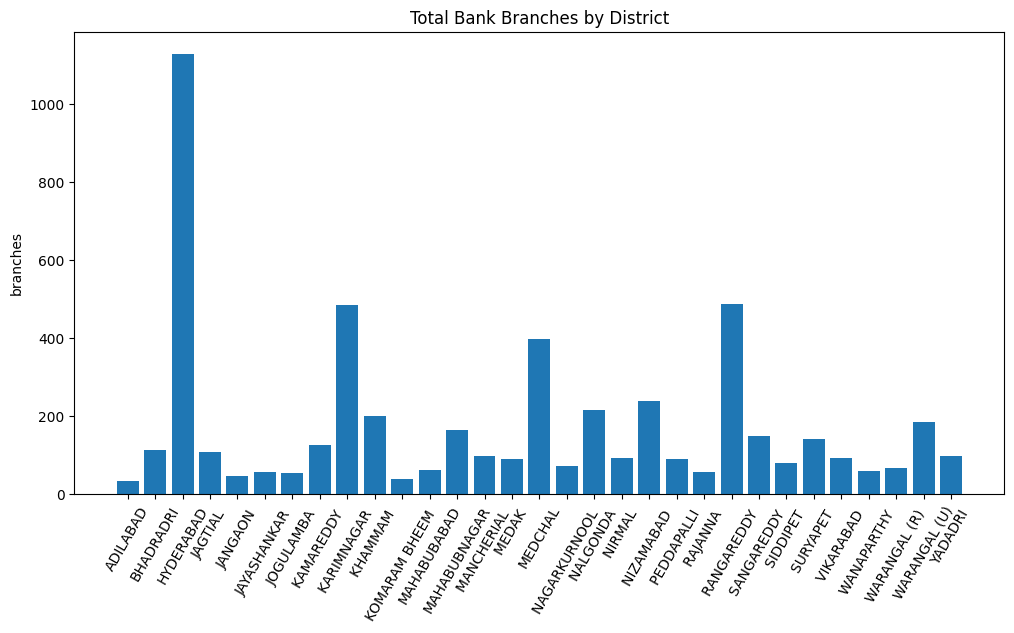

In [77]:

plt.figure(figsize=(12,6)) 
plt.title("Total Bank Branches by District")
plt.xticks(rotation=60)
plt.ylabel("branches")
plt.bar(data["districts"], data["total_branches"])

plt.savefig("branches_chart.png")
print("Chart saved as branches_chart.png")